In [14]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
import random
# Predict via the user-specific median.
# If the user has no data, use the global median.

train_file = 'train.csv'
test_file  = 'test.csv'
soln_file  = 'user_median.csv'
profiles_file = 'profiles.csv'



In [2]:
# Load the training data.
train_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = row[2]
    
        if not user in train_data:
            train_data[user] = {}
        
        train_data[user][artist] = int(plays)

In [3]:
# Load profiles.
sex_data = {}
age_data={}
country_data={}
with open(profiles_file, 'r') as profiles_fh:
    profiles_csv = csv.reader(profiles_fh, delimiter=',', quotechar='"')
    next(profiles_csv, None)
    for row in profiles_csv:
        user = row[0]
        sex = row[1]
        age = row[2]
        country = row[3]

        if not user in train_data:
            sex_data[user]={}
            age_data[user]={}
            country_data[user]={}
        
        sex_data[user] = sex
        age_data[user] = age
        country_data[user] = country

In [4]:
print sex_data[user]
print age_data[user]
print country_data[user]

m
21
Germany


In [19]:
#dictionary mapping users to array of features
user_features = {}
user_clusters = {}
cluster_means = []
cluster_count = []
numclusters = 1

#initialize clusters
for i in range(numclusters):
    cluster_means.append(i)
    cluster_means[i] = 0
    cluster_count.append(i)
    cluster_count[i] = 0

In [20]:
#assign clusters to user somehow

In [21]:
#feature 0: mean of log of plays
plays_array = []
for user, user_data in train_data.iteritems():
    user_plays = []
    for artist, plays in user_data.iteritems():
        plays_array.append(math.log(plays))
        user_plays.append(math.log(plays))
    user_features[user] = [np.mean(np.array(user_plays))]
    
    #assign cluster to the user somehow
    user_clusters[user] = 0
    
    #find mean for each cluster
    cluster_means[user_clusters[user]] += user_features[user][0]
    cluster_count[user_clusters[user]] += 1

#previously called global_median
user_features["*"] = [np.mean(np.array(plays_array))]

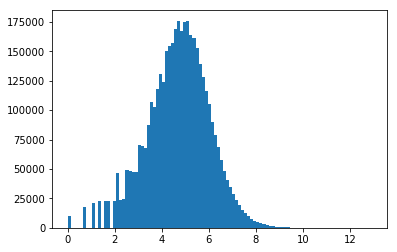

In [22]:
# histogram
plt.hist(plays_array, bins=100)
plt.show()


In [23]:
#find cluster means
for cluster in range(len(cluster_means)):
    #if exist items in cluster, use mean of all items in cluster
    if cluster_count[cluster] > 0:
        cluster_means[cluster] /= cluster_count[cluster]
    #otherwise just use global median
    else:
        cluster_means[cluster] = user_features["*"][0]
    print cluster_means[cluster]



4.65992926036


In [24]:
# Find training error
error = 0
N = 0
for user, user_data in train_data.iteritems():
    for artist, plays in user_data.iteritems():
        error += abs(math.exp(cluster_means[user_clusters[user]]) - plays)
        N += 1

print error/N

201.62166678


In [26]:
#**fix to match new way of predicting***

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                soln_csv.writerow([id, user_medians[user]])
            else:
                print "User", id, "not in training data."
                soln_csv.writerow([id, global_median])
                


NameError: name 'user_means' is not defined

In [ ]:
#training error:
#all global_median 201.220027948
#user_median if exists  195.363189455
#one cluster of medians 208.014032891
#one cluster of medians using mean of logs: 201.62166678
